In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df = pd.get_dummies(df, columns=["Geography", "Gender"], drop_first=True)

In [13]:
df = df.astype(int)

In [14]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0,2,1,0,96270,0,0,0,1
9996,516,35,10,57369,1,1,1,101699,0,0,0,1
9997,709,36,7,0,1,0,1,42085,1,0,0,0
9998,772,42,3,75075,2,1,0,92888,1,1,0,1


In [15]:
X=df.drop(["Exited"], axis=1)
y=df["Exited"]

In [16]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,0,0,0
1,608,41,1,83807,1,0,1,112542,0,1,0
2,502,42,8,159660,3,1,0,113931,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0
4,850,43,2,125510,1,1,1,79084,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0,2,1,0,96270,0,0,1
9996,516,35,10,57369,1,1,1,101699,0,0,1
9997,709,36,7,0,1,0,1,42085,0,0,0
9998,772,42,3,75075,2,1,0,92888,1,0,1


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [19]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2694,628,29,3,113146,2,0,1,124749,1,0,1
5140,626,29,4,105767,2,0,0,41104,0,0,0
2568,612,47,6,130024,1,1,1,45750,1,0,0
3671,646,52,6,111739,2,0,1,68367,1,0,0
7427,714,33,8,122017,1,0,0,162515,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2895,621,47,7,107363,1,1,1,66799,1,0,1
7813,684,63,3,81245,1,1,0,69643,1,0,0
905,672,45,9,0,1,1,1,92027,0,0,0
5192,663,39,8,0,2,1,1,101168,0,0,0


In [20]:
y_train

2694    0
5140    0
2568    1
3671    0
7427    0
       ..
2895    0
7813    1
905     1
5192    0
235     1
Name: Exited, Length: 8000, dtype: int32

In [21]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9953,550,47,2,0,2,1,1,97057,0,0,1
3850,680,34,3,143292,1,1,0,66526,0,0,1
4962,531,42,2,0,2,0,1,90537,0,0,0
3886,710,34,8,147833,2,0,1,1561,1,0,1
5437,543,30,6,73481,1,1,1,176692,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3919,763,39,7,0,2,1,0,19458,0,1,0
162,800,49,7,108007,1,0,0,47125,0,0,0
7903,567,34,10,0,2,0,1,161571,0,1,1
2242,621,30,2,101014,2,1,1,165257,1,0,0


In [22]:
y_test

9953    0
3850    0
4962    0
3886    0
5437    0
       ..
3919    0
162     0
7903    0
2242    0
2745    0
Name: Exited, Length: 2000, dtype: int32

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [24]:
X_train_scale.shape

(8000, 11)

In [25]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [26]:
model = Sequential()
model.add(Dense(10,activation='relu',input_dim=11))
model.add(Dense(3,activation='relu',input_dim=10))
model.add(Dense(1,activation='sigmoid'))

C:\Users\ARIFA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 157 (628.00 B)

 Trainable params: 157 (628.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [29]:
history = model.fit(X_train_scale,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.4496 - loss: 0.8124 - val_accuracy: 0.7962 - val_loss: 0.5476
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8050 - loss: 0.5190 - val_accuracy: 0.7975 - val_loss: 0.4753
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7969 - loss: 0.4735 - val_accuracy: 0.7975 - val_loss: 0.4531
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7966 - loss: 0.4501 - val_accuracy: 0.7975 - val_loss: 0.4422
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7976 - loss: 0.4414 - val_accuracy: 0.7975 - val_loss: 0.4340
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7984 - loss: 0.4259 - val_accuracy: 0.8012 - val_loss: 0.4239
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8116 - loss: 0.4113 - val_accuracy: 0.8100 - val_loss: 0.4125
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8180 - loss: 0.3973 - val_accu

In [30]:
model.layers[0].get_weights()

[array([[ 1.55933872e-01, -4.16773170e-01,  8.84814337e-02,
          2.73506582e-01,  4.52492714e-01,  5.31474017e-02,
         -2.37891808e-01, -1.68873787e-01, -1.36571288e-01,
          1.28987268e-01],
        [-1.02700400e+00,  1.56222522e-01, -7.03236461e-01,
         -5.41315138e-01, -4.54954296e-01,  2.65935659e-01,
         -1.00779608e-02,  7.03654587e-01,  6.96310937e-01,
         -1.00936219e-01],
        [-3.91810052e-02, -5.09997830e-02, -1.90672174e-01,
          2.25819767e-01, -1.66551769e-01,  1.39430895e-01,
          1.83688790e-01,  2.69891441e-01,  5.56534603e-02,
          8.22703913e-02],
        [-8.34178478e-02, -2.25131422e-01,  4.19826061e-02,
         -1.20227849e+00,  1.36229187e-01,  1.20024338e-01,
         -2.80547023e-01, -1.11862114e-02, -3.75143081e-01,
          2.52709925e-01],
        [ 4.25396115e-02, -3.61147583e-01, -2.69639343e-01,
         -3.43835860e-01,  5.31196296e-01,  5.12480974e-01,
          1.03376043e+00,  6.70160592e-01, -6.142472

In [31]:
model.layers[1].get_weights()

[array([[-0.39387634,  1.00931   ,  0.6091674 ],
        [ 0.5793354 ,  0.40012634,  0.45385778],
        [-0.49934307, -0.11291283,  0.52813745],
        [-0.89745337, -0.3229743 , -0.21792461],
        [ 0.47795987,  0.19341485,  0.5396267 ],
        [ 0.2526437 ,  0.71529245,  0.6676142 ],
        [ 0.62048894,  0.651692  ,  0.3058234 ],
        [ 0.22489923,  1.009729  ,  0.6297867 ],
        [-0.35558063, -0.6121919 , -0.629407  ],
        [ 0.9219512 , -0.34543064,  0.27206498]], dtype=float32),
 array([-0.42034307,  0.6230487 ,  0.7635285 ], dtype=float32)]

In [32]:
y_log = model.predict(X_test_scale)
y_log

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.02213116],
       [0.0759799 ],
       [0.05005486],
       ...,
       [0.00428064],
       [0.01964103],
       [0.35034296]], dtype=float32)

In [33]:
y_pred = np.where(y_log > 0.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8615

In [70]:
history

In [72]:
history.history

{'accuracy': [0.6039062738418579,
  0.7970312237739563,
  0.7971875071525574,
  0.7971875071525574,
  0.7970312237739563,
  0.7984374761581421,
  0.8031250238418579,
  0.8090624809265137,
  0.8145312666893005,
  0.8178125023841858,
  0.819531261920929,
  0.8201562762260437,
  0.8203125,
  0.8212500214576721,
  0.8218749761581421,
  0.8443750143051147,
  0.8500000238418579,
  0.8514062762260437,
  0.8534374833106995,
  0.8535937666893005,
  0.8551562428474426,
  0.8560937643051147,
  0.8548437356948853,
  0.856249988079071,
  0.8568750023841858,
  0.8565624952316284,
  0.8570312261581421,
  0.8581249713897705,
  0.8600000143051147,
  0.8587499856948853,
  0.8598437309265137,
  0.8592187762260437,
  0.8592187762260437,
  0.859375,
  0.8596875071525574,
  0.8609374761581421,
  0.8595312237739563,
  0.8604687452316284,
  0.8610937595367432,
  0.8600000143051147,
  0.8595312237739563,
  0.8609374761581421,
  0.8607812523841858,
  0.8604687452316284,
  0.8612499833106995,
  0.861093759536743

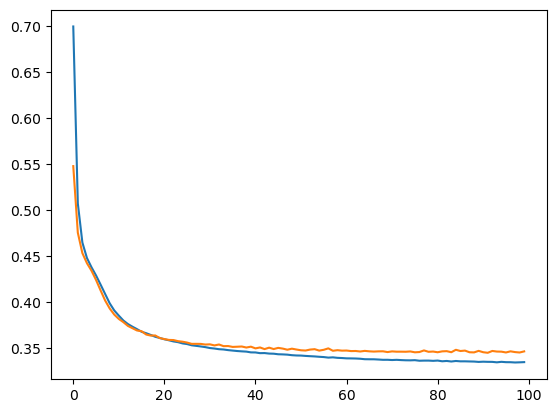

In [76]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

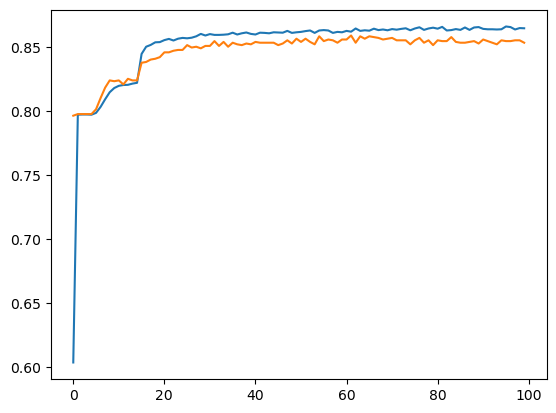

In [78]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])